# Day 2 – Stress Signals
##  Focus: Feature Engineering + Regression
**Topics Covered:**  
• Encoding  
• Normalization  
• Feature Selection  
• Regression Models (Linear, Ridge, Lasso)  
• Evaluation Metrics (MSE, R²)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("/content/cleaned_burnout_dataset.csv")
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [8]:
df.dtypes.value_counts()
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [9]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Encoded dataset shape:", df_encoded.shape)
df_encoded.head()

Encoded dataset shape: (3000, 46)


,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,...,Department_Sales,Department_Support,RemoteWork_No,RemoteWork_Yes,HasMentalHealthSupport_Yes,HasTherapyAccess_Yes,SalaryRange_40K-60K,SalaryRange_60K-80K,SalaryRange_80K-100K,SalaryRange_<40K
0,1001,50,14,47,3.37,5.06,9.47,4.16,7.0,7.9,...,False,False,True,False,False,True,True,False,False,False
1,1002,36,1,59,7.39,2.00,5.65,3.74,7.2,9.0,...,False,False,False,False,True,True,False,False,True,False
2,1003,29,13,59,7.10,7.17,5.70,8.80,5.2,9.7,...,False,False,False,False,False,False,False,False,True,False
3,1004,42,15,31,4.18,3.76,6.40,4.69,8.7,5.8,...,False,False,False,True,True,True,False,True,False,False
4,1005,40,6,34,8.28,2.34,3.41,2.12,4.2,3.3,...,False,True,False,True,True,True,False,False,False,True


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,3000.0,0.000000e+00,1.000167,-1.731474,-0.865737,0.000000,0.865737,1.731474
Age,3000.0,-4.736952e-17,1.000167,-1.708073,-0.890625,0.017651,0.835099,1.652548
YearsAtCompany,3000.0,-9.710751e-17,1.000167,-1.673731,-0.845096,-0.016462,0.812172,1.640806
WorkHoursPerWeek,3000.0,2.498742e-16,1.000167,-1.708340,-0.883852,0.058421,0.882910,1.707398
BurnoutLevel,3000.0,2.664535e-17,1.000167,-1.752044,-0.858369,-0.011321,0.827956,1.744944
JobSatisfaction,3000.0,2.368476e-18,1.000167,-1.710680,-0.870278,-0.002891,0.864496,1.758868
StressLevel,3000.0,-2.439530e-16,1.000167,-1.734555,-0.866384,-0.007817,0.886283,1.722761
ProductivityScore,3000.0,-9.118632e-17,1.000167,-1.733508,-0.858998,-0.011338,0.875637,1.718503
SleepHours,3000.0,1.965835e-16,1.000167,-1.761194,-0.859441,0.042313,0.874701,1.707089
PhysicalActivityHrs,3000.0,-6.454097e-17,1.000167,-1.758543,-0.849627,-0.010627,0.863331,1.737289


In [11]:
correlation = df_encoded.corr()['StressLevel'].sort_values(ascending=False)
print(correlation.head(10))


StressLevel                1.000000
Department_IT              0.030686
Country_USA                0.029805
SalaryRange_60K-80K        0.029182
JobRole_Project Manager    0.028002
TeamSize                   0.024669
HasTherapyAccess_Yes       0.023196
JobRole_Sales Associate    0.020579
Country_UK                 0.017729
SalaryRange_40K-60K        0.015369
Name: StressLevel, dtype: float64


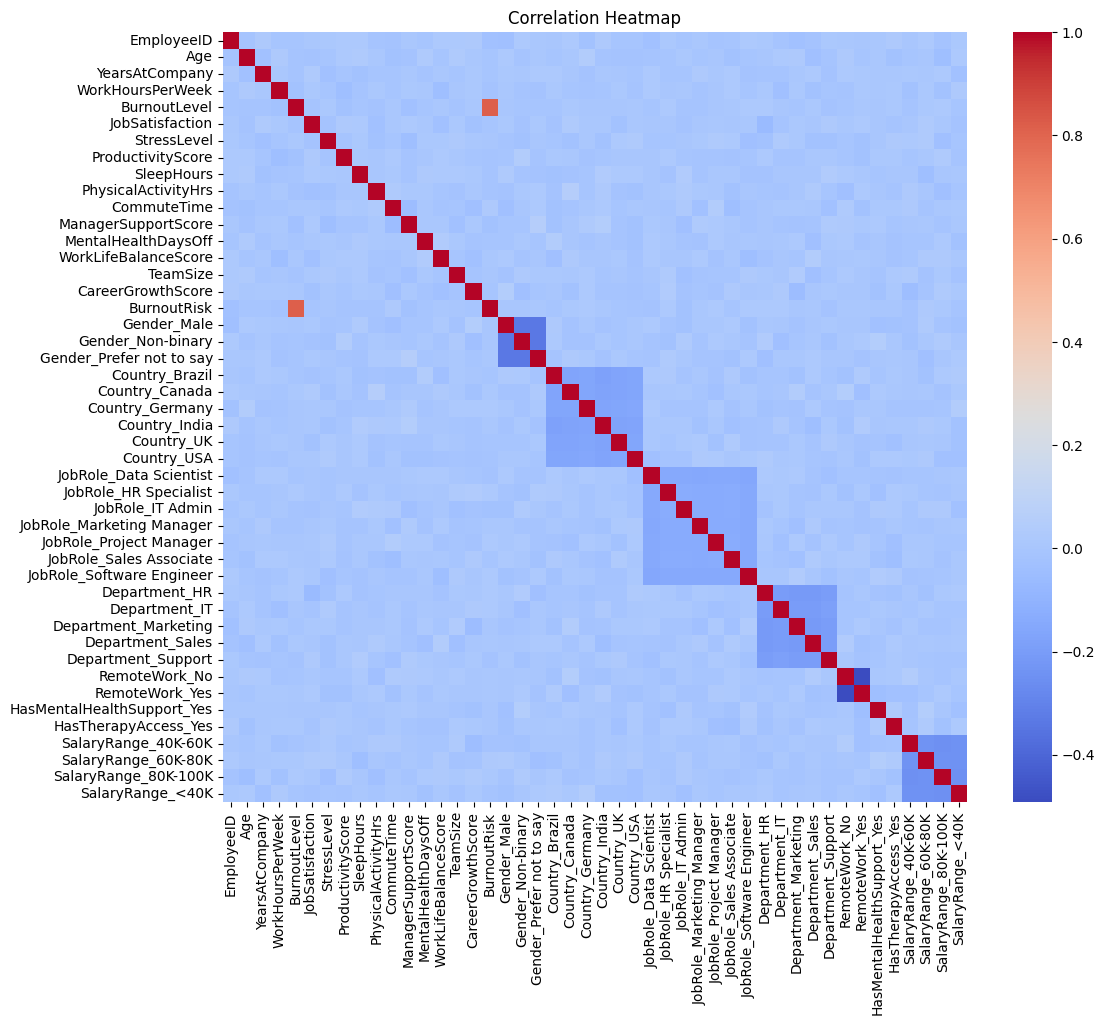

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [13]:
from sklearn.feature_selection import mutual_info_regression

X = df_encoded.drop(columns=['StressLevel'])
y = df_encoded['StressLevel']

mi_scores = mutual_info_regression(X, y)

mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print(mi_series.head(10))


JobRole_Project Manager    0.016725
SalaryRange_40K-60K        0.012782
SleepHours                 0.011451
Department_Marketing       0.010723
CareerGrowthScore          0.010268
RemoteWork_Yes             0.008945
SalaryRange_<40K           0.008640
BurnoutRisk                0.008295
ManagerSupportScore        0.007725
Country_Germany            0.007340
dtype: float64


In [14]:
df_encoded['Stress_Work'] = df_encoded['StressLevel'] * df_encoded['WorkHoursPerWeek']

In [15]:

df_encoded['Sleep_per_Stress'] = df_encoded['SleepHours'] / (df_encoded['StressLevel'] + 1e-5)


In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

y = df_encoded['StressLevel']

X = df_encoded.drop('StressLevel', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:\n  MSE: {mse:.4f}\n  R² Score: {r2:.4f}\n")


Linear Regression:
  MSE: 1.0395
  R² Score: -0.0637

Ridge Regression:
  MSE: 1.0392
  R² Score: -0.0634

Lasso Regression:
  MSE: 0.9796
  R² Score: -0.0024

